<a href="https://colab.research.google.com/github/visha1Sagar/Plant-Disease-Detection/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading the Dataset**

In [4]:
!pip install kaggle

In [5]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:06<00:00, 20.6MB/s]
100% 2.70G/2.70G [02:06<00:00, 23.0MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip

# **Predict Plant Disease using Transfer Learning - MobileNet**

# **Importing Libraries**

In [7]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **1. Read Training Data**

In [36]:
train_data=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

)

In [37]:
train_generator=train_data.flow_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical',
    subset='training'  # Set to 'training' for training images

)

Found 56251 images belonging to 38 classes.


# **2.Read Validation Data**

In [38]:
validation_generator = train_data.flow_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical',
    subset='validation'  # Set to 'validation' for validation images
)

Found 14044 images belonging to 38 classes.


# **3. Read Test Data**

In [39]:
test_data=ImageDataGenerator(
    rescale=1./255
)

In [40]:
test_generator=test_data.flow_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    target_size=(224, 224),
    batch_size=512,
    class_mode='categorical'

)

Found 17572 images belonging to 38 classes.


**Showing Each Class Name and Coressponding Index**

In [32]:
# Display the 38 unique class names (labels) each one in seperated line
for label,index in train_generator.class_indices.items():
    print(index," : ",label)

0  :  Apple___Apple_scab
1  :  Apple___Black_rot
2  :  Apple___Cedar_apple_rust
3  :  Apple___healthy
4  :  Blueberry___healthy
5  :  Cherry_(including_sour)___Powdery_mildew
6  :  Cherry_(including_sour)___healthy
7  :  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8  :  Corn_(maize)___Common_rust_
9  :  Corn_(maize)___Northern_Leaf_Blight
10  :  Corn_(maize)___healthy
11  :  Grape___Black_rot
12  :  Grape___Esca_(Black_Measles)
13  :  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14  :  Grape___healthy
15  :  Orange___Haunglongbing_(Citrus_greening)
16  :  Peach___Bacterial_spot
17  :  Peach___healthy
18  :  Pepper,_bell___Bacterial_spot
19  :  Pepper,_bell___healthy
20  :  Potato___Early_blight
21  :  Potato___Late_blight
22  :  Potato___healthy
23  :  Raspberry___healthy
24  :  Soybean___healthy
25  :  Squash___Powdery_mildew
26  :  Strawberry___Leaf_scorch
27  :  Strawberry___healthy
28  :  Tomato___Bacterial_spot
29  :  Tomato___Early_blight
30  :  Tomato___Late_blight
31  :  T

**Show 50 Random Image and Its Corresponding Label**

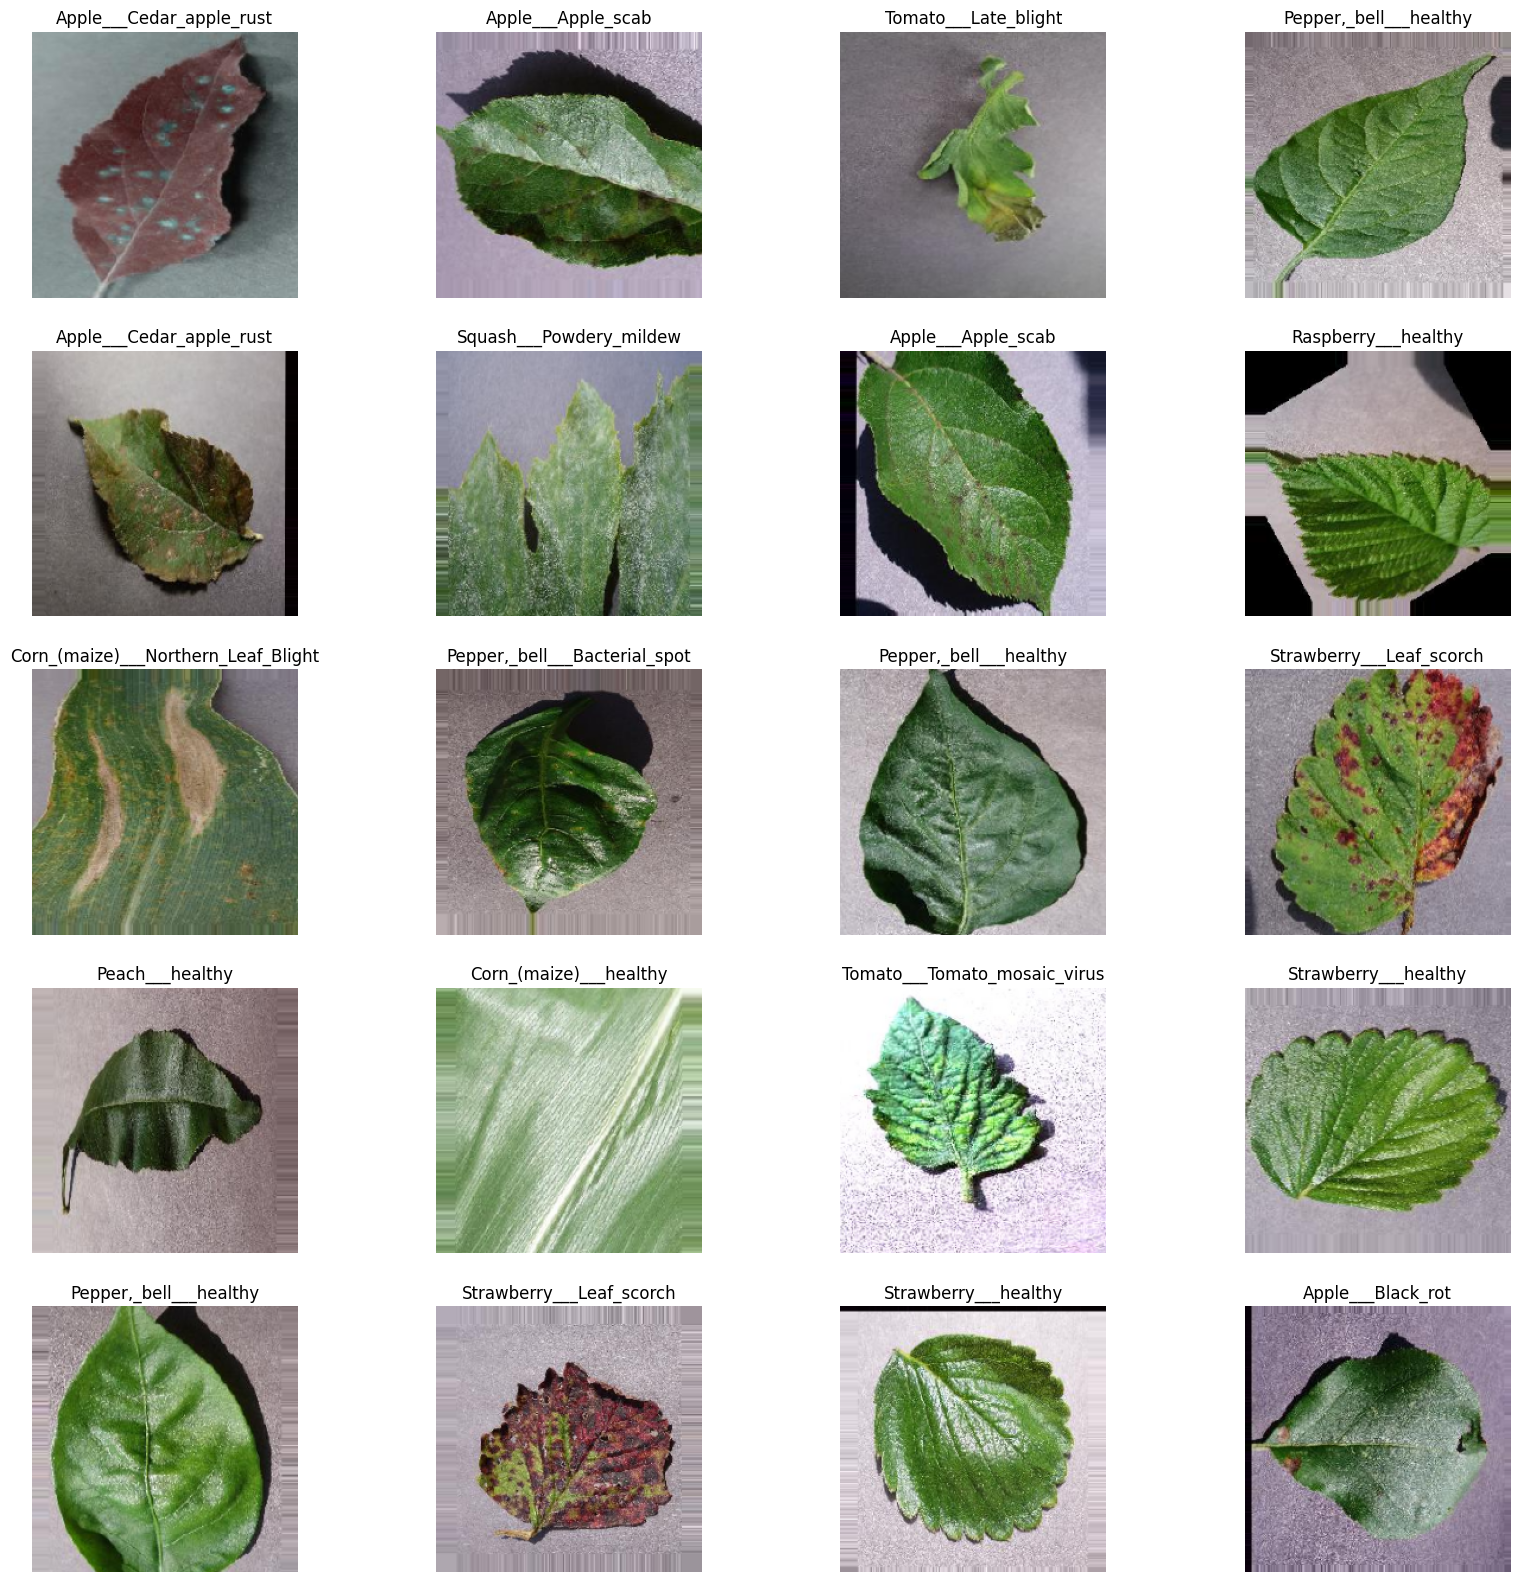

In [33]:
# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)  # Get the next batch (128 images in this case)

# Reverse the class_indices dictionary to get a mapping from index to class name
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Convert one-hot encoded labels back to the index form (if using categorical mode)
label_indices = np.argmax(labels, axis=1)

# If you want to shuffle the batch and display 20 random images
random_indices = np.random.choice(len(images), 20, replace=False)  # Choose 20 random indices

# Plot 20 random images with labels
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 4, i + 1)  # Create a grid of 5 rows and 10 columns
    plt.imshow(images[idx])
    plt.title(class_labels[label_indices[idx]])  # Show the label as the title
    plt.axis('off')  # Hide the axis

plt.show()

# **Transfer Learning - MobileNet**

In [1]:
from tensorflow.keras.applications import MobileNet

In [45]:
base_model=MobileNet(input_shape=(224,224,3),weights='imagenet',include_top=False)
base_model.trainable = False

In [46]:
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(38, activation="softmax")(x)

In [47]:
mobilenet_model = Model(inputs, outputs, name='mobilenet_model')
mobilenet_model.summary()

Model: "mobilenet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,814 (12.47 MB)

 Trainable params: 38,950 (152.15 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [48]:
mobilenet_model.compile(optimizer='adam',loss='categorical_crossentropy',
                        metrics=['accuracy',"recall","precision"])

In [49]:
mobilenet_history=mobilenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1

)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.4442 - loss: 2.2092 - precision: 0.7858 - recall: 0.2317 - val_accuracy: 0.8956 - val_loss: 0.4289 - val_precision: 0.9623 - val_recall: 0.8065
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8962 - loss: 0.4011 - precision: 0.9524 - recall: 0.8220 - val_accuracy: 0.9308 - val_loss: 0.2760 - val_precision: 0.9648 - val_recall: 0.8839
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.9314 - loss: 0.2629 - precision: 0.9632 - recall: 0.8900 - val_accuracy: 0.9401 - val_loss: 0.2195 - val_precision: 0.9666 - val_recall: 0.9120
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9433 - loss: 0.2093 - precision: 0.9676 - recall: 0.9153 - val_accuracy: 0.9477 - val_loss: 0.1903 - val_precision: 0.9674 - val_recall: 0.9243
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9521 - loss: 0.1754 - precision: 0.9697 - recall: 0.9316 - val_accuracy: 0.9494 - val_los

**Show Highest Training and Validaion Loss & Accuracy**

In [50]:
# using max to use best model saved by modelcheckpoint
train_accuracy = max(mobilenet_history.history['accuracy'])
val_accuracy = max(mobilenet_history.history['val_accuracy'])

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9689
Validation Accuracy: 0.9611


**Evaluation based on test data `test_generator`**

In [51]:
results=mobilenet_model.evaluate(test_generator)

loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]
print('Tesing Metrics For MobileNet Model')
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9697 - loss: 0.1038 - precision: 0.9787 - recall: 0.9588
Tesing Metrics For MobileNet Model
Loss: 0.10832945257425308
Accuracy: 0.9680742025375366
Precision: 0.9570908546447754
Recall: 0.9776201844215393


**Visualization of MobileNet Model Evaluation Metrics**

In [52]:
print(mobilenet_history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


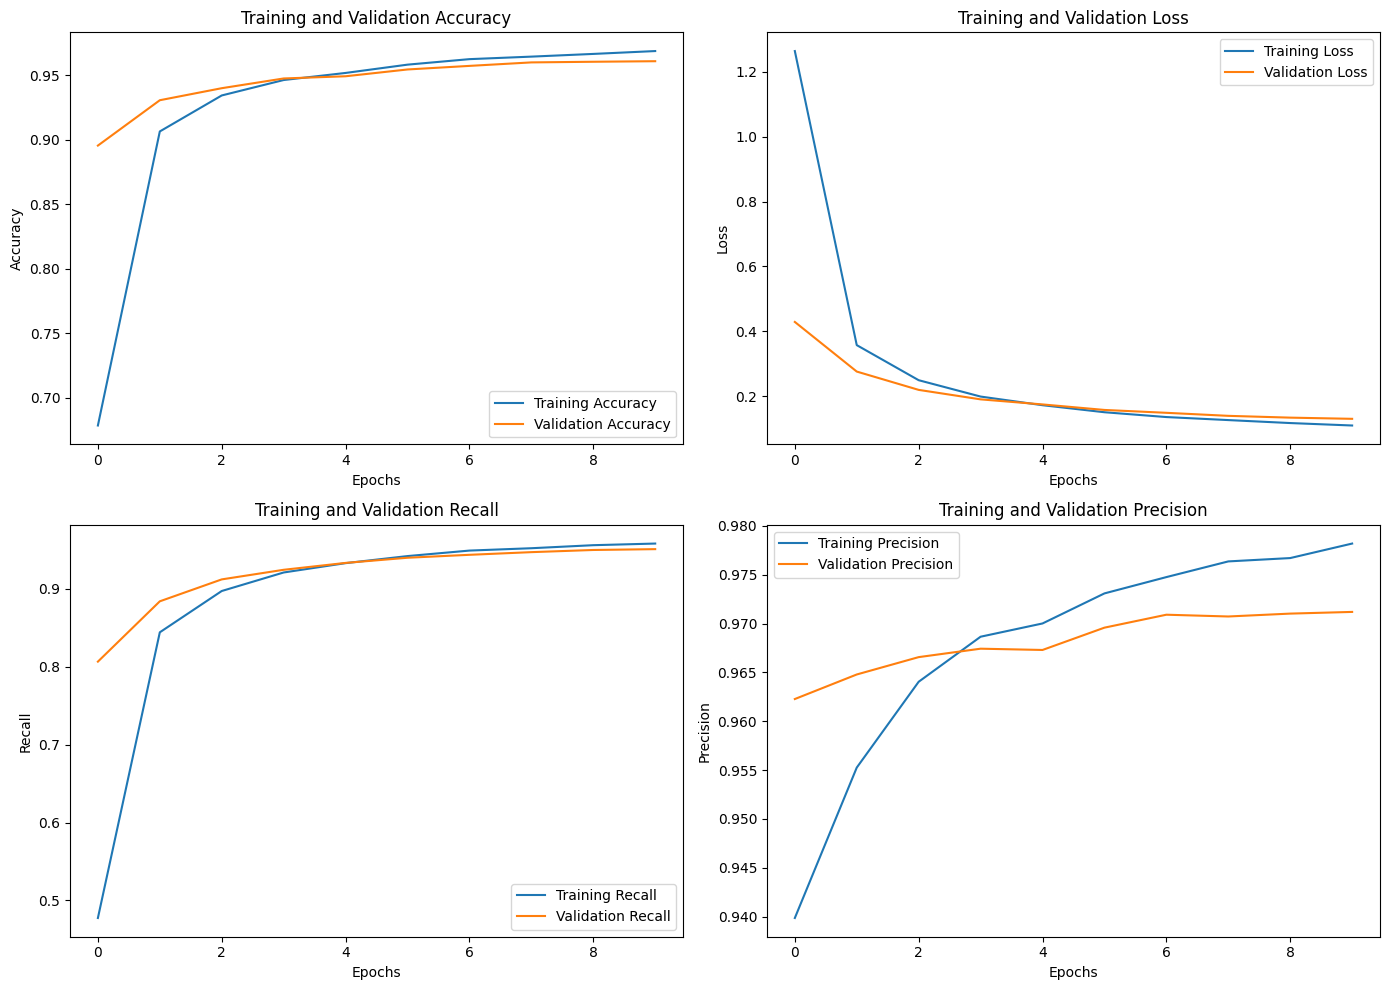

In [53]:
# Create a figure with 2 rows and 2 columns for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot training and validation accuracy
axs[0, 0].plot(mobilenet_history.history['accuracy'], label='Training Accuracy')
axs[0, 0].plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Training and Validation Accuracy')
axs[0, 0].legend()

# Plot training and validation loss
axs[0, 1].plot(mobilenet_history.history['loss'], label='Training Loss')
axs[0, 1].plot(mobilenet_history.history['val_loss'], label='Validation Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Training and Validation Loss')
axs[0, 1].legend()

# Plot training and validation recall
axs[1, 0].plot(mobilenet_history.history['recall'], label='Training Recall')
axs[1, 0].plot(mobilenet_history.history['val_recall'], label='Validation Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Training and Validation Recall')
axs[1, 0].legend()

# Plot training and validation precision
axs[1, 1].plot(mobilenet_history.history['precision'], label='Training Precision')
axs[1, 1].plot(mobilenet_history.history['val_precision'], label='Validation Precision')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_title('Training and Validation Precision')
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# **Evaluation Function**

In [75]:
# Get class names from the test generator for display
class_names = list(test_generator.class_indices.keys())

# Function to predict and display images from the test generator
def predict_images_from_generator(model, generator, class_names, num_images=1):
    images_shown = 0

    # Display the image
    plt.figure(figsize=(20, 10+3*num_images))

    # Iterate through batches from the generator
    for images, labels in generator:
        predictions = model.predict(images, verbose=1)
        predicted_classes = np.argmax(predictions, axis=1)
        actual_classes = np.argmax(labels, axis=1)

        # Loop over batch images
        for i in range(len(images)):
            if images_shown >= num_images:
                return

            # Get actual and predicted labels
            actual_label = class_names[actual_classes[i]]
            predicted_label = class_names[predicted_classes[i]]

            plt.subplot(5, 3, i + 1)
            plt.imshow(images[i])
            plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")


            images_shown += 1

        plt.axis('off')
        plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


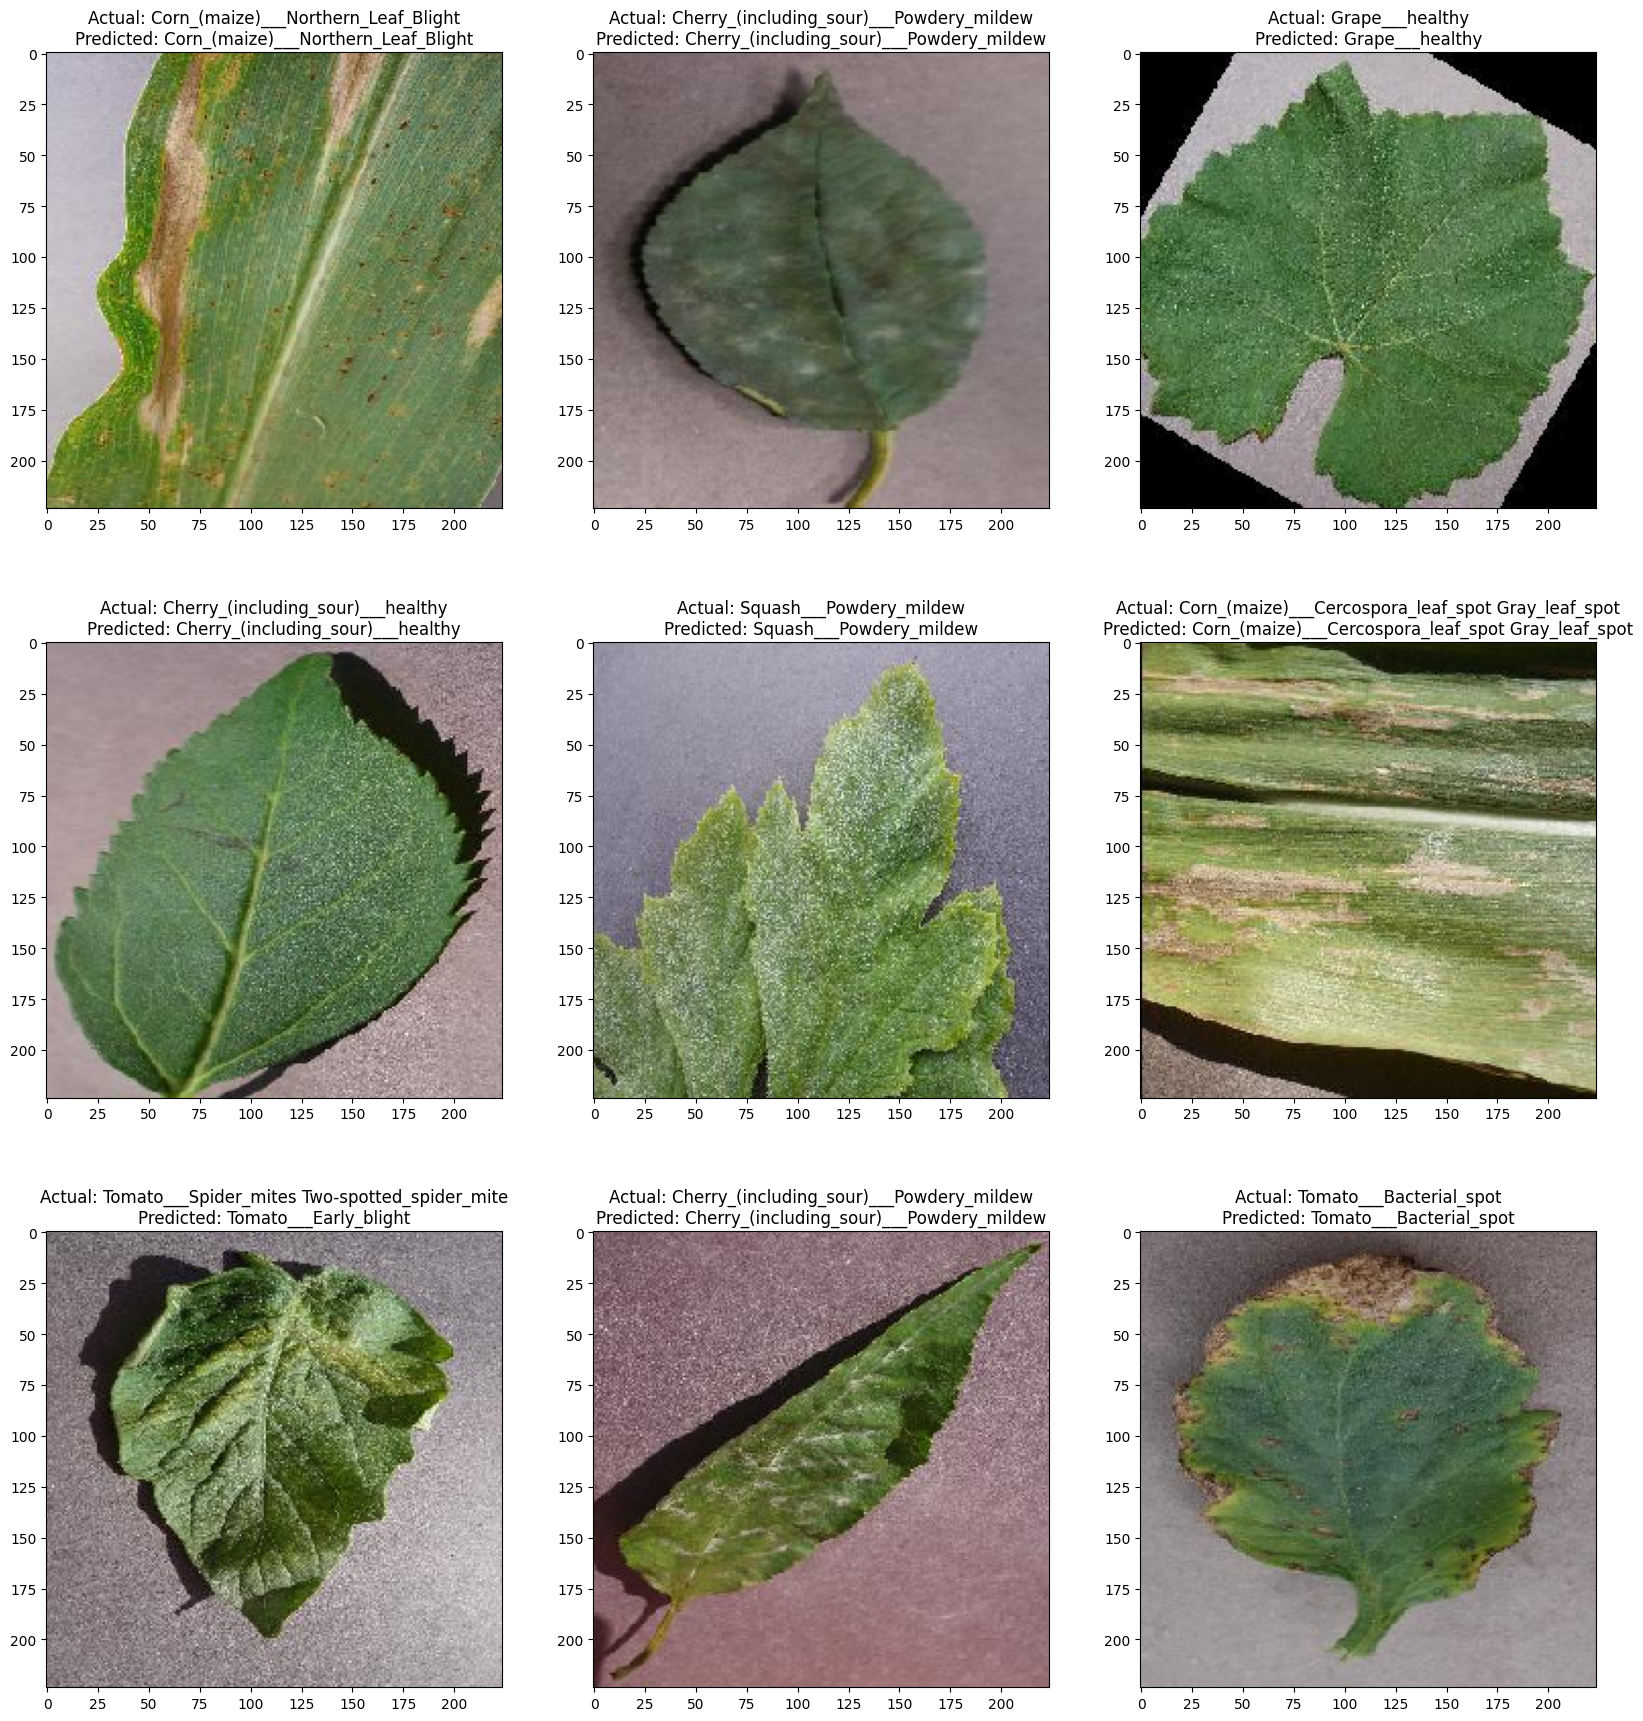

In [77]:
predict_images_from_generator(mobilenet_model, test_generator, class_names, num_images=9)